In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from xgboost import plot_importance
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train=pd.read_csv("/content/drive/My Drive/Input Train v2.csv")
test=pd.read_csv("/content/drive/My Drive/Input Test v2.csv")

# EDA

In [23]:
print("Null Values in Train Data")
print(train.isnull().sum(),"\n")
print("Null Values in Test Data")
print(test.isnull().sum())

Null Values in Train Data
pat_iden                 0
time_from_anchor         0
Event_name               0
lab_result_numeric       0
Event_desc            3732
y_flag                   0
dtype: int64 

Null Values in Test Data
pat_iden                 0
time_from_anchor         0
Event_name               0
lab_result_numeric       0
Event_desc            1548
dtype: int64


## Exploration of Train Data

In [24]:
print("Total transactions cases : ",train.shape[0])
print("positive transcations: ",sum(train["y_flag"]==1))
print("negetive transcations: ",sum(train["y_flag"]==0))

Total transactions cases :  1294578
positive transcations:  826642
negetive transcations:  467936


In [25]:
train.nunique()

pat_iden               2604
time_from_anchor        720
Event_name             1007
lab_result_numeric    15412
Event_desc              699
y_flag                    2
dtype: int64

In [0]:
grouped=train.groupby("pat_iden",as_index=False)['y_flag'].agg('mean')
count=grouped.groupby(['y_flag'],as_index=False).count()

In [27]:
print("Total unique patients : ",train['pat_iden'].nunique())
print("Patients tested positive: ",count['pat_iden'][1])
print("Patients negetive: ",count['pat_iden'][0])

Total unique patients :  2604
Patients tested positive:  1221
Patients negetive:  1383


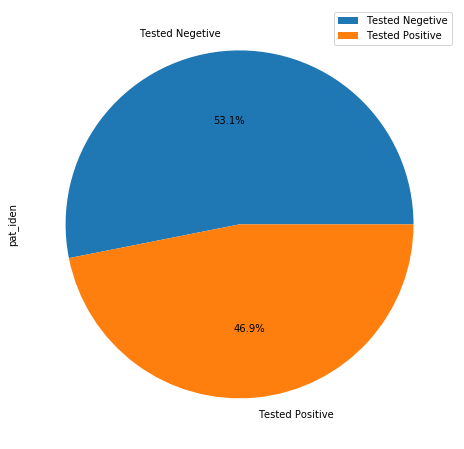

In [29]:
# Cheacking imbalancedness of data
labels='Tested Negetive','Tested Positive'
plot = count.plot.pie(y="pat_iden", figsize=(12, 8),labels=labels,autopct='%1.1f%%')

In [0]:
######Training and Testing files are created after Feature Extraction#####
#df_new_train=pd.read_csv("/content/drive/My Drive/Training.csv")
#df_new_test=pd.read_csv("/content/drive/My Drive/Testing.csv")
#training=df_new_train.copy()
#testing=df_new_test.copy()

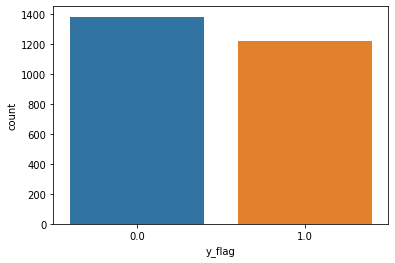

In [50]:
#sns.countplot(x='y_flag', data=training)

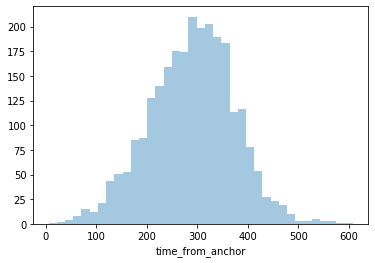

In [51]:

#sns.distplot(training.time_from_anchor, kde=False);

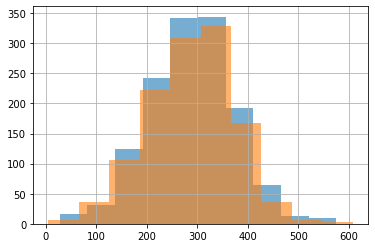

In [52]:

#training.groupby('y_flag').time_from_anchor.hist(alpha=0.6);

# Base Line Model

In [0]:
#Preprocessing
le = preprocessing.LabelEncoder()
X=train.copy()

In [0]:
X.drop('pat_iden',inplace=True,axis=1)

In [0]:
X[["Event_name"]] = X[["Event_name"]].apply(lambda col: le.fit_transform(col))
X.drop("Event_desc",axis=1,inplace=True)
target=X.pop("y_flag")

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

In [0]:
model_1=XGBClassifier()

In [40]:
model_1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred = model_1.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 64.03%


# Creating Event Cols

In [0]:
#Here I have tried to group the data into major event Event Cols.
X2=train.copy()

In [47]:
# creating event cols
X2['Lab_test'] = X2.apply(lambda row: 1 if row.Event_name[0:2]=="lb" else 0, axis = 1)
X2['Diagnosis'] = X2.apply(lambda row: 1 if row.Event_name[0:2]=="dx" else 0, axis = 1)
X2['Procedure'] = X2.apply(lambda row: 1 if row.Event_name[0:2]=="px" else 0, axis = 1)
X2['Treatments'] = X2.apply(lambda row: 1 if row.Event_name[0:2]=="rx" else 0, axis = 1)
X2['BMI'] = X2.apply(lambda row: 1 if row.Event_name[0:2]=="wt" else 0, axis = 1)

KeyboardInterrupt: ignored

In [0]:
le = preprocessing.LabelEncoder()
X2[["pat_iden","Event_name"]] = X2[["pat_iden","Event_name"]].apply(lambda col: le.fit_transform(col))
X2.drop("Event_desc",axis=1,inplace=True)
target2=X2.pop("y_flag")
X_train, X_test, y_train, y_test = train_test_split(X2, target2, test_size=0.2, random_state=42)

In [0]:
model_2=XGBClassifier()
model_2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.66%


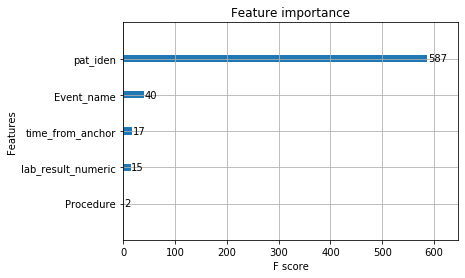

In [0]:
plot_importance(model)
plt.show()

In [0]:
print(model.feature_importances_)

[0.5846222  0.08486752 0.11341365 0.1510558  0.         0.
 0.06604082 0.         0.        ]


In [0]:
X2.columns

Index(['pat_iden', 'time_from_anchor', 'Event_name', 'lab_result_numeric',
       'Lab_test', 'Diagnosis', 'Procedure', 'Treatments', 'BMI'],
      dtype='object')

# Binning the time data into classes.

In [0]:
# Binning the time data into bins of 100.
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800]
label = [100, 200, 300, 400, 500, 600, 700, 800]

In [0]:
df['binned_time'] = pd.cut(df['time_from_anchor'], bins=bins,labels=label)
df['binned_time'] = df['binned_time'].astype('int64')

In [0]:
df.drop(["time_from_anchor","Event_desc"],inplace=True,axis=1)

In [0]:
one_hot=pd.get_dummies(df['Event_name'])

In [0]:
one_hot.shape

(1294578, 1007)

# Feature Extract

In [0]:
X_train=train.copy()
X_test=test.copy()

In [0]:
event_dummy=X_train['Event_name'].append(X_test['Event_name'])

In [0]:
one_hot=pd.get_dummies(event_dummy)

In [0]:
one_hot_train=one_hot[:train.shape[0]]
one_hot_test=one_hot[train.shape[0]:]

In [0]:
X_train=X_train.join(one_hot_train)
X_test=X_test.join(one_hot_test)

In [12]:
for i in range(0,train.shape[0]):
  temp=X_train["Event_name"][i]
  X_train[temp][i]=X_train['lab_result_numeric'][i]
  if i%100000==0:
    print(i/100000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0


In [13]:
for i in range(0,test.shape[0]):
  temp=X_test["Event_name"][i]
  X_test[temp][i]=X_test['lab_result_numeric'][i]
  if i%100000==0:
    print(i/100000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0.0
1.0
2.0
3.0
4.0
5.0


In [0]:
X_train.to_csv("/content/drive/My Drive/Training_ungrouped.csv")
X_test.to_csv("/content/drive/My Drive/Testing_ungrouped.csv")

In [0]:
# Splitting and grouping due to RAM overflow
X_train_1=X_train[:X_train.shape[0]//2]
X_train_2=X_train[X_train.shape[0]//2:]
df_new_train_1 = X_train_1.groupby(X_train_1['pat_iden'],as_index=False).aggregate('mean')
df_new_train_2 = X_train_2.groupby(X_train_2['pat_iden'],as_index=False).aggregate('mean')
df_new_train=df_new_train_1.append(df_new_train_2)
df_new_train=df_new_train.groupby(df_new_train['pat_iden'],as_index=False).aggregate('mean')

In [0]:
df_new_test = X_test.groupby(X_test['pat_iden'],as_index=False).aggregate('mean')

In [0]:
df_new_train.to_csv("/content/drive/My Drive/Training.csv")
df_new_test.to_csv("/content/drive/My Drive/Testing.csv")

In [17]:
df_new_train.shape

(2604, 1035)

# Fianl Model on Extracted Dataset

In [0]:
df_new_train=pd.read_csv("/content/drive/My Drive/Training.csv")
df_new_test=pd.read_csv("/content/drive/My Drive/Testing.csv")

In [0]:
training=df_new_train.copy()
testing=df_new_test.copy()

In [0]:
ans_train=pd.DataFrame(training.pop('pat_iden'))
ans_test=pd.DataFrame(testing.pop('pat_iden'))
target=training.pop("y_flag")

In [0]:
X_train, X_test, y_train, y_test = train_test_split(training, target, test_size=0.2, random_state=42)

In [76]:
model=XGBClassifier()
model.fit(training,target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [77]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.80%


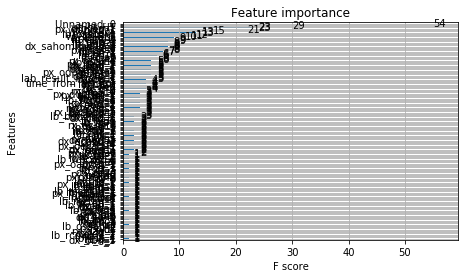

In [78]:
plot_importance(model)
plt.show()

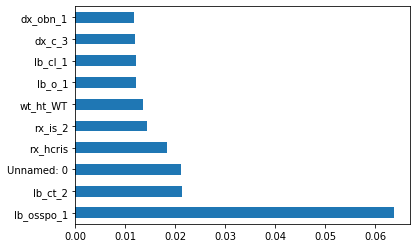

In [79]:
feat_importances = pd.Series(model.feature_importances_, index=training.columns)
feat_importances.nlargest(10).plot(kind='barh')

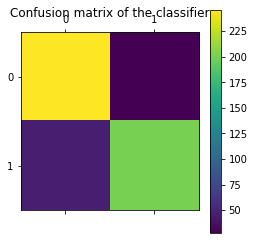

In [82]:
cm = confusion_matrix(y_test, y_pred) 
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       274
         1.0       0.88      0.81      0.84       247

    accuracy                           0.86       521
   macro avg       0.86      0.86      0.86       521
weighted avg       0.86      0.86      0.86       521



# Predicting Test Values

In [0]:
pred_test=model.predict_proba(testing)

In [0]:
ans=ans_test

In [18]:
pred_test

array([[0.52292407, 0.47707596],
       [0.74536407, 0.2546359 ],
       [0.68800294, 0.3119971 ],
       ...,
       [0.6282413 , 0.37175873],
       [0.5919089 , 0.40809113],
       [0.6424756 , 0.3575244 ]], dtype=float32)

In [0]:
ans['pred_prob_1']=pred_test[:,1]

In [20]:
ans

,pat_iden,pred_prob_1
0,100000001,0.477076
1,100000009,0.254636
2,100000011,0.311997
3,100000015,0.066846
4,100000017,0.511302
...,...,...
1111,100003709,0.371785
1112,100003711,0.279563
1113,100003715,0.371759
1114,100003716,0.408091


In [0]:
ans.to_csv("Final_answer_1.csv",index=False)